In [1]:
print("Lecture-10")

Lecture-10


Dense.compile(optimizer='rmsprop',
 loss=None,
 metrics=None,
 loss_weights=None,
 weighted_metrics=None,
 run_eagerly=None,
 steps_per_execution=None,
 **kwargs
) 

__OPTIMIZER__

W değerlerinin ve bias değerlerinin iyileştirilmesi için kullanılacak algoritmayı belirlemektedir. Loss fonkyionu yalnızca bizim hedefe yaklaşma miktarımızı hesaplamakta kullanılmaktadır. Loss fonksiyonun belirttiği hedefe daha iyi yaklaşmak için w değerlerinni ve bias değerlerinin nasıl güncellenmesi gerektiği optimizasyon algoritmasıyla ilgilidir. Çok kullanılan üç optimizasyon algoritması "rmsprop (root mean square propagation), "adam (adaptive moment estimation)" ve "sgd (stochastic gradient descent)" algoritmalarıdır. 

rmsprop
adam
sgd

model.compile(optimizer='adam', loss=binary_crossentropy)

tensorflow.keras.optimizers 

from tensorflow.keras.losses import msle
from tensorflow.keras.optimizers import Adam

model.compile(optimizer=Adam(), loss=msle)

__METRICS__

metric parametesi bir liste biçiminde metrik fonksiyonlar denilen fonksiyonları almaktadır. Metrik fonksiyonlar da loss fonksiyonları gibi tahmin edilen değerlerle gerçek değerler arasında farklılığı ifade etmekte kullanılmaktadırlar. Ancak "loss" fonksiyonlarından eğitim sürecinde ve her batch işlemi bittiğinde faydalanılırken metrik fonksiyonlardan eğitim ve sınama (validation) sürecinde her epoch bittiğinde faydalanılmaktadır. Metrik fonksiyonları uygulamıcıya eğitimdeki sınama süreçlerinde "eğitim performansı hakkında bilgi" vermektedir. Loss fonksiyonlarının algoritmanın işleyişi konuusunda etkili, metrik fonksiyonlarının ise yalnızca eğitimin gidişatı hakkında bilgi vermektedir.

__SINAMA (VALIDATION)__

Sınama eğitim sırasında modelin gidişatını izlemek için yapılan bir test işlemidir. Sınama işlemi her "epoch" işleminden sonra yapılmaktadır. Sınama işlemi de bir veri kümesiyle yapılmaktadır. İstenilirse eğitim veri kümesinin bir bölümünü sınama amacıyla kullanılabilir ya da sınama verilerini ayrı bir biçimde oluşturulabilir. Sınama işlemi ile test işlemi karıştırılmamalıdır. Sınama eğitim sırasında eğitimin gidişatı hakkında bilgi edinmek için test ise eğitim bittikten sonra modelin başaraısın test etmek için yapılan işlemdir.

sınama işlemi sırasında kullanılabilecek çeşitli metrik fonksiyonlar bulunmaktadır.

accuracy, binary_accuracy, categorical_accuracy, mae, mape, mse


model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['binary_accuracy'])

4) Modelin Eğitilmesi: Sequential.compile metodu ile modelin konfigure edilmesinden sonra sıra eğitim aşamasına gelmiştir. Eğitim modeldeki nöronların w katsayılarının ve bias değerlerinin uygun biçimde ayarlanmasını sağlayan bir süreçtir. 

Sequential.fit(x=None,
 y=None,
 batch_size=None,
 epochs=1,
 verbose='auto',
 callbacks=None,
 validation_split=0.0,
 validation_data=None,
 shuffle=True,
 class_weight=None,
 sample_weight=None,
 initial_epoch=0,
 steps_per_epoch=None,
 validation_steps=None,
 validation_batch_size=None,
 validation_freq=1,
 max_queue_size=10,
 workers=1,
 use_multiprocessing=False
)

__BATCH KAVRAMI__

Aslında genellikle eğitim sırasında veriler teker teker işleme sokulup "w" ve "bias" değerleri güncellenmektedir. Çünkü model parametrelerinin bu biçimde teker teker (satır satır) işleme oskularak güncellenmesi on binlerce hatta milyonlarca eğitim verisi söz konusu olduğunda hem çok zaman almakta hem de "overfitting" denilen durum nedeniyle eğitim başarısın düşürebilmektedir. Eğitim süreci bu yüzden veirleri teker teker değilde grup grup işleme sokulması yoluyla yapılmaktadır. Burada tek hamlede işleme sokulan bir grup satıra "batch" denilmektedir. Böylece bir batch (yani bir grup satır) ağa girdi olarak veirlir. Sonra buradan bir grup çıktı elde edilir. Bu bir grup çıktı "loss" fonksiyonnua sokularak gerçek değerlerle elde edilen değerler arasındaki fark hesaplanıyor. Optimzasyon algoritmasıyla da bu fark minimize edilecek biçimde "w" ve "bias" değerleri güncellenir.

batch_size parametresi batch büyüklüğünün kaç satırdan oluşacağını belirtiyor. Her batch işleminden sonra loss fonksiyonu kullanılarak tahmin edlen değerle gerçek değer arasındaki fark hesaplanmakta ve optimazsyon algoritması çalıştırlarak w ve bias değerleri güncellenmektedir. Bu işleme "iterasyon" da denilmektedir. yani iterasyon batch_size kadar satırın işleme sokulup bundan loss değeriin elde edilmesi ve daha sonra optimizasyon algoritması ile "w" ve "bias" değerlerinin güncellenmesi süreci belirtmektedir. 

__EPOCH__

Eğitim veri kümesi batch batch işleme sokulup bitirldikten sonra yeniden işleme sokulabilmektedir. Eğitim veri kümesinin yeniden işleme sokulmasına "epoch" denilmektedir. Genelleikle eğitim sırasında eğitim veri kümesi bir kez değil birden çok kez işleme sokulmaktadır. Çoğu zaman epoch değerini yükselttiğimizde öğrenmenin daha başaraılı olduğunu görürüz. Ancak belli bir epoch değerinden sonra artık öğrenme başarısı anlamlı biçimnde artmaya da bilir. Epochs parametresi eğitim veri kümesinin eğitim sürecinde baştan sona toplamda kaçta kez kullanılacağını belirtmektedeir. Her epoch işleminden sonra sınama (validation) işlemi yapılıyor. 

validation_data parametresi ile sınama işleminde kullanılacak veriler dışarıdan alınabilir. validation_split isimli parametre bizim verdiğimiz verilerin yüzde kaçınnı sınama için kullanılacağını belirtmektedir. 

In [4]:
import pandas as pd

df = pd.read_csv('diabetes.csv')

dataset_x = df.iloc[:, :-1].to_numpy()
dataset_y = df.iloc[:, -1].to_numpy()

from sklearn.model_selection import train_test_split

training_dataset_x, test_dataset_x, training_dataset_y, test_dataset_y = train_test_split(dataset_x, dataset_y)

from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

model = Sequential(name='Sample')
model.add(Dense(64, activation='relu', input_dim=dataset_x.shape[1], name = 'Hidden-1'))
model.add(Dense(64, activation='relu', name = 'Hidden-2'))
model.add(Dense(1,  activation='sigmoid', name = 'Output'))

model.summary()

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['binary_accuracy'])
model.fit(training_dataset_x, training_dataset_y, epochs=200, validation_split=0.2)

Model: "Sample"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Hidden-1 (Dense)            (None, 64)                576       
                                                                 
 Hidden-2 (Dense)            (None, 64)                4160      
                                                                 
 Output (Dense)              (None, 1)                 65        
                                                                 
Total params: 4,801
Trainable params: 4,801
Non-trainable params: 0
_________________________________________________________________
Epoch 1/200
15/15 [==============================] - 1s 22ms/step - loss: 2.5778 - binary_accuracy: 0.5630 - val_loss: 1.3322 - val_binary_accuracy: 0.6638
Epoch 2/200
15/15 [==============================] - 0s 8ms/step - loss: 1.2782 - binary_accuracy: 0.5913 - val_loss: 0.8826 - val_binary_accuracy: 0.6983
Epoch 3/200

Çıktıdaki "loss" epoch içerisindeki batch işlemlerinden elde edilen ortalama loss değerini val_loss ise sınama verisinden elde edilen loss değerini belirtmektedir. Her epoch bittiğinde bu loss değeri yeniden o epoch'taki ortalamayı belritecek biçimde hesaplanmaktadır. val_loss değeri ve diğer metrik değerler ise her epoch'tan sonra sınama verilerini kullanarak her defasında yenide hesaplanmaktadır. metrik değerlerin başına da val_xxx biçiminde önek getirildiğini görüyoruz. Bu val öneki ilgili sonucun sınama verisinden elde edildiğini göstermektedir. başna val öneki getirilmeyen metrik değerler ise eğitim sırasında o epoch'tan elde edilen ortalama değerlerdir.

Bir sinir ağı modelini her eğittimizde elde ettiğimiz değerler birbirinden farklı olabilmektedir. Bunun temelde iki nedeni vardır:

- Eğitim ve sınama verileri her eğitimde birbirinden farklı olacak biçimde değişebilmektedir. 
- Her eğitim sürecinde nöronların başlangıçtaki "w" ağırlık değerleri değişebilmektedir.

Eğitim veri kümesi ne kadar küçükse, uygulanan epoch ne kadar azsa eğitimler arasındaki değerler o derece değişme eğiliminde olur. Eğer her eğitimde aynı sonuçları almak istiyorsak:

1) train_test_split fonksiyonunda tohum değeri random_state parametresiyle herhangi bir değer biçiminde açıkça belirtmeliyiz:

training_dataset_x, test_dataset_x, training_dataset_y, test_dataset_y = train_test_split(dataset_x, dataset_y, random_state=1234567)

2) Dense sınıfında katmandaki nöronların başlangıç "w" değerlerinin rastgele alınması için kullanılacak rastgele sayı üreticilerinin tohum değerlerini de seed parametresiyle belli bir değerle set etmeliyiz.

from tensorflow.keras.initalizers import GlorotUniform

model.add(Dense(64, activation='relu', input_dim=dataset_x.shape[1], kernel_initializer=GlorotUniform(seed=12345) name = 'Hidden-1'))

3) fit metodunda da her epoch'tan sonra eğitim veri kümesinin yeniden karıştırılmasını engellemek için shuffle parametresini False girebiliriz.



In [5]:
import pandas as pd

df = pd.read_csv('diabetes.csv')

dataset_x = df.iloc[:, :-1].to_numpy()
dataset_y = df.iloc[:, -1].to_numpy()

from sklearn.model_selection import train_test_split

training_dataset_x, test_dataset_x, training_dataset_y, test_dataset_y = train_test_split(dataset_x, dataset_y, random_state=1234)

from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.initializers import GlorotUniform

model = Sequential(name='Sample')
model.add(Dense(64, activation='relu', kernel_initializer=GlorotUniform(seed=1234) , input_dim=dataset_x.shape[1], name = 'Hidden-1'))
model.add(Dense(64, activation='relu', kernel_initializer=GlorotUniform(seed=1234) ,name = 'Hidden-2'))
model.add(Dense(1,  activation='sigmoid', kernel_initializer=GlorotUniform(seed=1234) ,name = 'Output'))

model.summary()

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['binary_accuracy'])
model.fit(training_dataset_x, training_dataset_y, epochs=200, validation_split=0.2, shuffle=False)

# Artık her eğitimde aynı sonuçları elde edebileceğiz.

Model: "Sample"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Hidden-1 (Dense)            (None, 64)                576       
                                                                 
 Hidden-2 (Dense)            (None, 64)                4160      
                                                                 
 Output (Dense)              (None, 1)                 65        
                                                                 
Total params: 4,801
Trainable params: 4,801
Non-trainable params: 0
_________________________________________________________________
Epoch 1/200
15/15 [==============================] - 1s 24ms/step - loss: 3.0425 - binary_accuracy: 0.5435 - val_loss: 1.1561 - val_binary_accuracy: 0.6810
Epoch 2/200
15/15 [==============================] - 0s 5ms/step - loss: 1.3766 - binary_accuracy: 0.5674 - val_loss: 0.8178 - val_binary_accuracy: 0.6638
Epoch 3/200

Peki bu yukarıdaki modelimizde daha fazla saklı katman eklesek model daha başarılı hale gelir mi? Bunun yanıtı "hayır" olacaktır. İşte her modelde saklı katman sayısının arttırılması modeli daha başarılı hale getirmemektedir. Pek çok regresyon modelinde iki saklı katman yeterli olmaktadır. 

- Özet:

- Toplam veri kümesi başlangıçta eğitim ve test veri kümesi olmak üzere iki ayrılmaktadır. Genellikle test veri ümesi toplam veri kümesinin %20'si civarlarda seçilmektedir.

- Eğitim veri kümesi de kendi arasında ikiye ayrılmaktadır. Asıl kısım eğitimde kullanılacak kısımd.r Diğer kısım sınama amacıyla kullanılan kısımdır. Sınama veri kümesi (validation dataset).

- Batch eğitim verilerinin tek tek değil bir grup olarak işleme sokulması anlamına gelmektedir. Batch işlemi hem bir yandan eğitim süresini kısaltırken hem de "overfitting" durumunu engellemektedir. 

- Epoch toplam eğitim verilerinin baştan sona kaç kere eğitimde kullanılacağını belirtmektedir.

- "w" değerleri ve "bias" değerleri her batch işleminden sonra güncellenmektedir.

- Sınama işlemi her epoch'tan sonra yapılmaktadır.

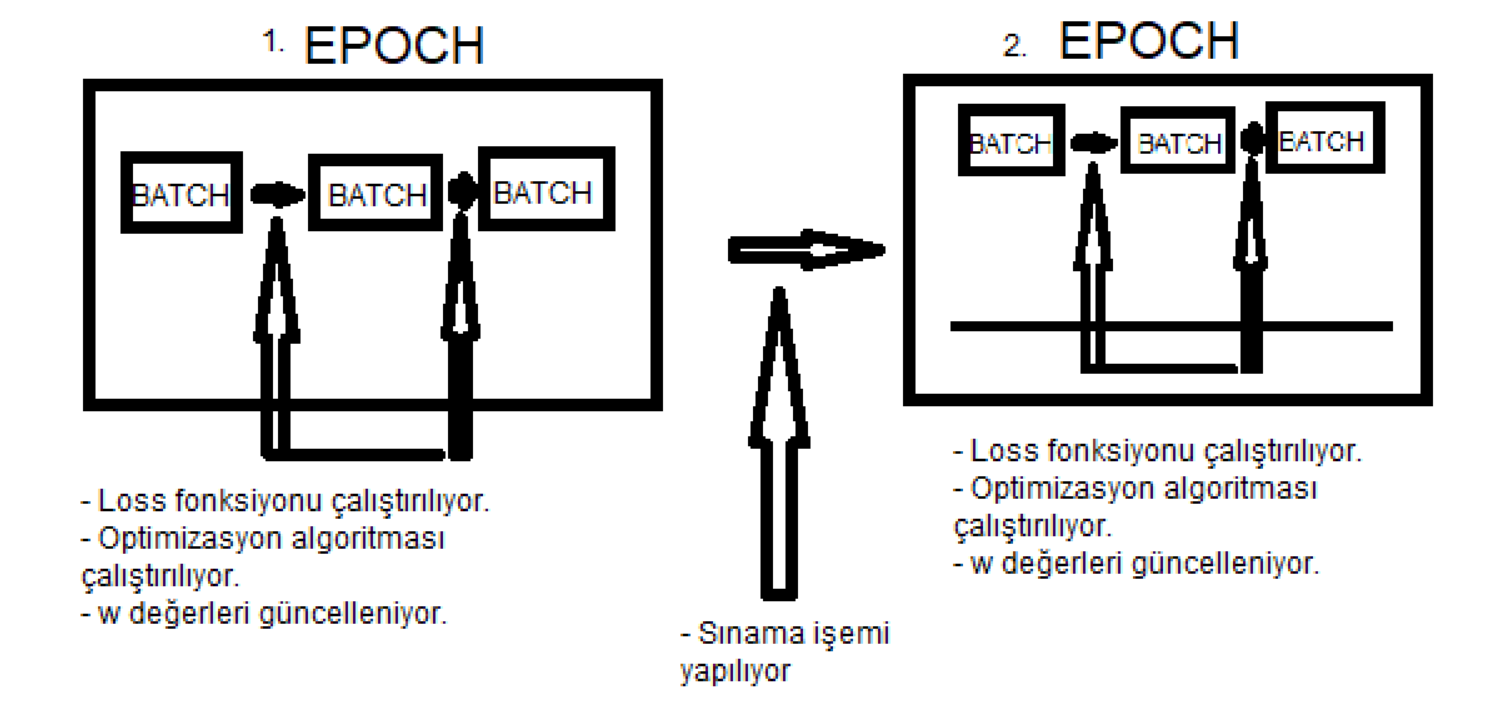

5) Modelin Test Edilmesi:
6) Model Üzerinde Kestirimlerin Yapılması:

ÖDEV:

- Katman Nöronlarında Kullanılan Aktivasyon Fonksiyonları
